In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
train= pd.read_csv('loan-train.csv')

In [3]:
test=pd.read_csv('loan-test.csv')

In [4]:
train1=train.copy() #to keep original datas
test1=test.copy()

In [5]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [7]:
train.shape #additional 1 target value, which is Loan_Status

(614, 13)

In [8]:
test.shape

(367, 12)

In [9]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


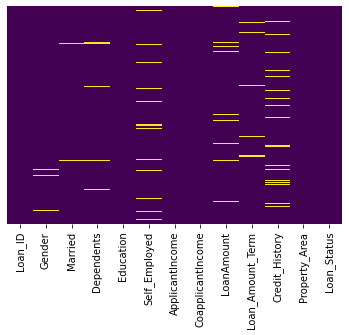

In [10]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap="viridis");

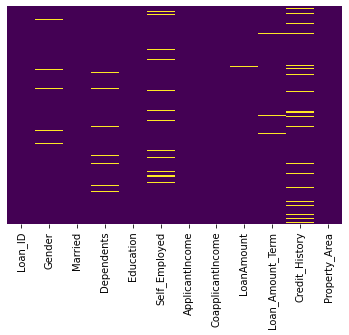

In [11]:
sns.heatmap(test.isnull(), yticklabels=False, cbar=False, cmap="viridis");

In [12]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [13]:
sns.set_style('whitegrid')

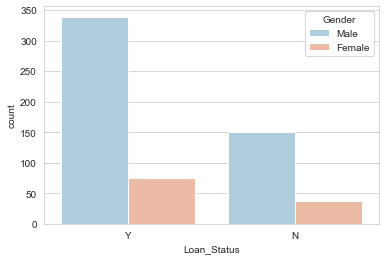

In [14]:
sns.countplot(x='Loan_Status', hue= 'Gender', data=train, palette='RdBu_r');

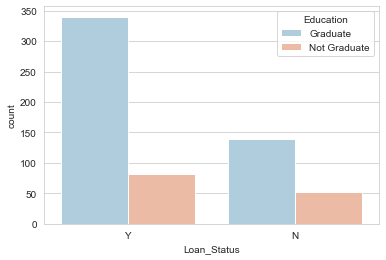

In [15]:
sns.countplot(x='Loan_Status', hue= 'Education', data=train, palette='RdBu_r');

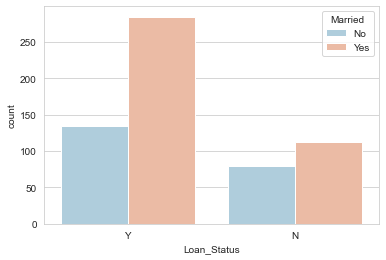

In [16]:
sns.countplot(x='Loan_Status', hue= 'Married', data=train, palette='RdBu_r');

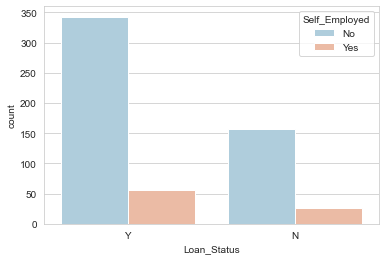

In [17]:
sns.countplot(x='Loan_Status', hue= 'Self_Employed', data=train, palette='RdBu_r');

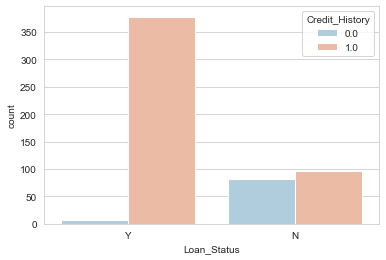

In [18]:
sns.countplot(x='Loan_Status', hue= 'Credit_History', data=train, palette='RdBu_r');

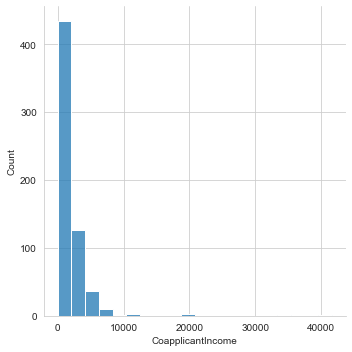

In [19]:
sns.displot(train["CoapplicantIncome"].dropna(), kde=False, bins=20);

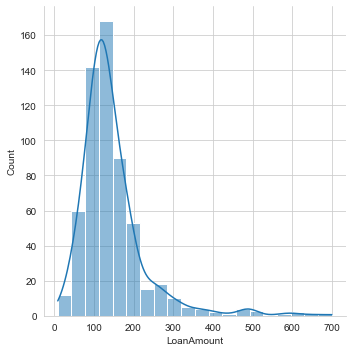

In [20]:
sns.displot(train["LoanAmount"].dropna(), kde=True, bins=20);

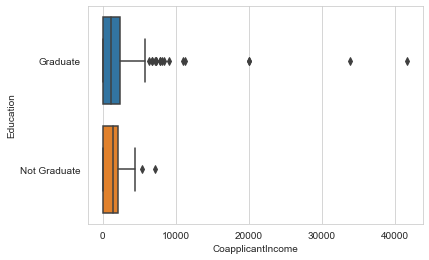

In [21]:
sns.boxplot(x=train.CoapplicantIncome, y=train.Education)
plt.show()

In [22]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [23]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)

In [24]:
train['Gender'].isnull().sum()

0

In [25]:
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True) #this is numerical value and median is better than mean value, because that makes to minimize the outliers effect.
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [26]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [27]:
test['Gender'].fillna(test['Gender'].mode()[0], inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0], inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].median(), inplace=True) 
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0], inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0], inplace=True)

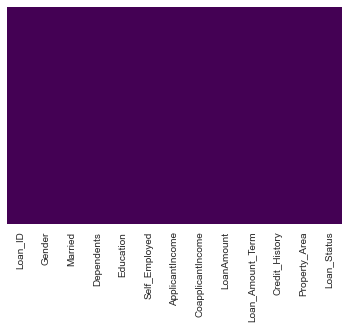

In [28]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap="viridis");

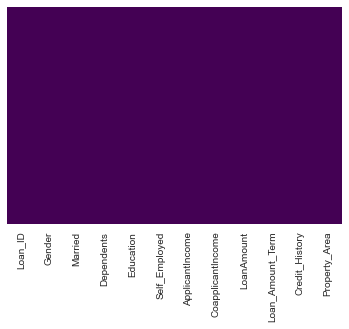

In [29]:
sns.heatmap(test.isnull(), yticklabels=False, cbar=False, cmap="viridis");

In [30]:
# I don't need to have Loan_ID column.

train.drop('Loan_ID', axis=1, inplace=True)

In [31]:
train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [32]:
test.drop('Loan_ID', axis=1, inplace=True)

In [33]:
test.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [34]:
# Before set a model, I need to convert all the categorical variables by get_dummies.

In [35]:
train = pd.get_dummies(train, drop_first =True)

In [36]:
train.head(2)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,128.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1
1,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0,0


In [37]:
test = pd.get_dummies(test, drop_first =True)

In [38]:
test.head(2)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5720,0,110.0,360.0,1.0,1,1,0,0,0,0,0,0,1
1,3076,1500,126.0,360.0,1.0,1,1,1,0,0,0,0,0,1


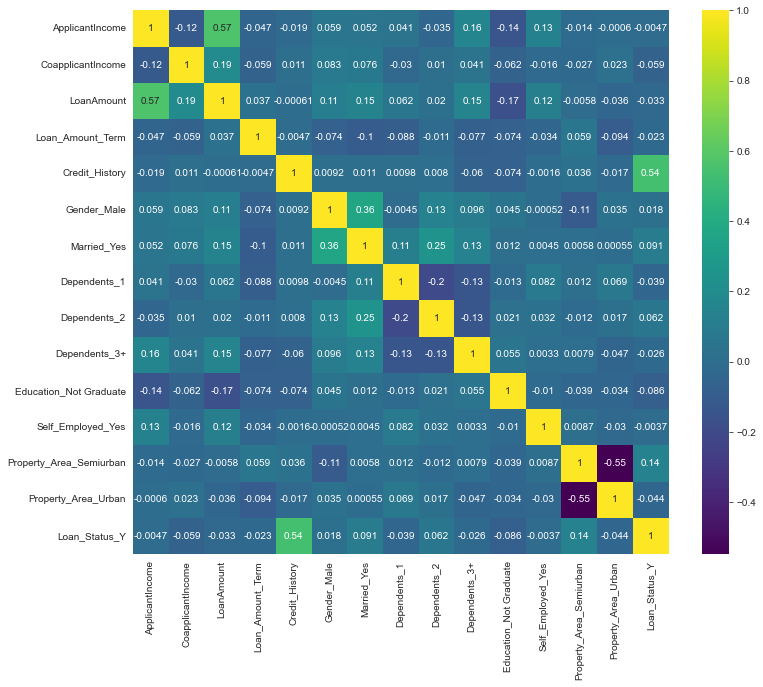

In [39]:
# to see correlation between features and target value.
plt.figure(figsize=(12,10)) 
sns.heatmap(train.corr(), annot=True, cmap='viridis')
plt.show()

In [40]:
# I have seen the most correlated features Credit_History and Loan_Status_Y, and applicant income and loan amount

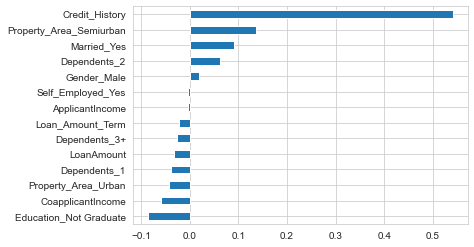

In [41]:
train.corr()["Loan_Status_Y"].drop("Loan_Status_Y").sort_values().plot.barh()
plt.show()

# Here, I first looked at the correlation of train with respect to the target variable, then dropped the Loan_Status_Y and saw the correlation between Loan_Status_Y and other fetaures.
# If remove the drop(Loan_Status_Y) part and run it, will see the difference.

# Train | Test Split and Scaling

## Logistic Regression

In [42]:
X=train.drop(["Loan_Status_Y"], axis=1)
y=train["Loan_Status_Y"]

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val= train_test_split(X, y, test_size=0.3, random_state=83)

print("X Train features shape: {}\ny Train features shape: {}\nX Test features shape : {}\nY Test features shape : {}".format (X_train.shape, Y_train.shape, X_val.shape, Y_val.shape))

X Train features shape: (429, 14)
y Train features shape: (429,)
X Test features shape : (185, 14)
Y Test features shape : (185,)


In [44]:
from sklearn.preprocessing import MinMaxScaler

In [45]:
scaler = MinMaxScaler()

In [46]:
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
log_model=LogisticRegression()

In [49]:
log_model.fit(X_train_scaled, Y_train)

LogisticRegression()

## Model Performance on Classification Tasks

## confusion matrix and classification report

In [50]:
y_pred=log_model.predict(X_val_scaled)

In [51]:
y_pred_proba = log_model.predict_proba(X_val_scaled)

In [52]:
val_data = pd.concat([X_val, Y_val], axis=1)
val_data["pred"] = y_pred
val_data["pred_proba"] = y_pred_proba[:,1] #probability of being 1
val_data.sample(10)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,pred,pred_proba
581,1836,33837.0,90.0,360.0,1.0,1,0,0,0,0,0,0,0,1,0,1,0.823090
61,3029,0.0,99.0,360.0,1.0,1,1,0,0,1,0,0,0,1,1,1,0.784395
312,2507,0.0,56.0,360.0,1.0,0,0,0,0,0,0,0,0,0,1,1,0.764531
328,4333,2451.0,110.0,360.0,1.0,0,1,0,0,0,0,0,0,1,0,1,0.849909
514,5815,3666.0,311.0,360.0,1.0,1,0,0,0,0,0,0,0,0,0,1,0.699280
275,2750,1842.0,115.0,360.0,1.0,1,1,1,0,0,0,0,1,0,1,1,0.795303
557,10139,0.0,260.0,360.0,1.0,1,1,0,0,1,0,1,1,0,1,1,0.868182
466,2947,1664.0,70.0,180.0,0.0,1,1,0,0,1,1,0,0,1,0,0,0.095085
347,3083,2168.0,126.0,360.0,1.0,1,1,0,1,0,1,0,0,1,1,1,0.750050
64,4166,0.0,116.0,360.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0.175414


In [53]:
from sklearn.metrics import confusion_matrix, classification_report

In [54]:
def eval_metric(model, X_train, Y_train, X_val, Y_val):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_val)
    
    print("Val_Set")
    print(confusion_matrix(Y_val, y_pred))
    print(classification_report(Y_val, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(Y_train, y_train_pred))
    print(classification_report(Y_train, y_train_pred))

In [55]:
eval_metric(log_model, X_train_scaled, Y_train, X_val_scaled, Y_val)

Val_Set
[[ 18  35]
 [  2 130]]
              precision    recall  f1-score   support

           0       0.90      0.34      0.49        53
           1       0.79      0.98      0.88       132

    accuracy                           0.80       185
   macro avg       0.84      0.66      0.68       185
weighted avg       0.82      0.80      0.77       185


Train_Set
[[ 64  75]
 [  5 285]]
              precision    recall  f1-score   support

           0       0.93      0.46      0.62       139
           1       0.79      0.98      0.88       290

    accuracy                           0.81       429
   macro avg       0.86      0.72      0.75       429
weighted avg       0.84      0.81      0.79       429



## cross validate

In [56]:
from sklearn.model_selection import cross_validate

In [57]:
model = LogisticRegression()

In [58]:
scores = cross_validate(model, X_train_scaled, Y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_precision,test_recall,test_f1,test_accuracy
1,0.019098,0.005034,0.823529,0.965517,0.888889,0.837209
2,0.016212,0.000000,0.783784,1.000000,0.878788,0.813953
3,0.018603,0.006091,0.800000,0.965517,0.875000,0.813953
4,0.016123,0.000000,0.743590,1.000000,0.852941,0.767442
5,0.017746,0.009933,0.763158,1.000000,0.865672,0.790698
6,0.010041,0.003071,0.852941,1.000000,0.920635,0.883721
7,0.017030,0.010070,0.729730,0.931034,0.818182,0.720930
8,0.014000,0.008050,0.828571,1.000000,0.906250,0.860465
9,0.008076,0.011745,0.823529,0.965517,0.888889,0.837209
10,0.012575,0.008076,0.783784,1.000000,0.878788,0.809524


In [59]:
df_scores.mean()[2:]

test_precision    0.793262
test_recall       0.982759
test_f1           0.877403
test_accuracy     0.813511
dtype: float64

## jaccard index

In [60]:
from sklearn.metrics import jaccard_score

In [61]:
jaccard_score(Y_val, y_pred, pos_label=0)

0.32727272727272727

## log loss

In [62]:
from sklearn.metrics import log_loss

In [63]:
log_loss(Y_val, y_pred_proba)

0.4873846117880441

## Support Vector Machine

## Modelling and Model Performance

In [64]:
from sklearn.svm import SVC

In [65]:
from sklearn.metrics import classification_report,confusion_matrix

In [66]:
def eval_metric(model, X_train, Y_train, X_val, Y_val):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_val)
    
    print("Val_Set")
    print(confusion_matrix(Y_val, y_pred))
    print(classification_report(Y_val, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(Y_train, y_train_pred))
    print(classification_report(Y_train, y_train_pred))

In [67]:
svm_model = SVC(random_state=42)
svm_model.fit(X_train_scaled, Y_train)
eval_metric(svm_model, X_train_scaled, Y_train, X_val_scaled, Y_val)

Val_Set
[[ 18  35]
 [  2 130]]
              precision    recall  f1-score   support

           0       0.90      0.34      0.49        53
           1       0.79      0.98      0.88       132

    accuracy                           0.80       185
   macro avg       0.84      0.66      0.68       185
weighted avg       0.82      0.80      0.77       185


Train_Set
[[ 64  75]
 [  5 285]]
              precision    recall  f1-score   support

           0       0.93      0.46      0.62       139
           1       0.79      0.98      0.88       290

    accuracy                           0.81       429
   macro avg       0.86      0.72      0.75       429
weighted avg       0.84      0.81      0.79       429



## cross validation

In [68]:
from sklearn.model_selection import cross_validate

In [69]:
model = SVC(random_state=42)

scores = cross_validate(model, X_train_scaled, Y_train, scoring = ['accuracy', 'precision','recall','f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy     0.813511
test_precision    0.793262
test_recall       0.982759
test_f1           0.877403
dtype: float64

## Decision Tree

In [85]:
from sklearn.tree import DecisionTreeClassifier

In [86]:
dt_model = DecisionTreeClassifier(random_state=101)

In [87]:
dt_model.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=101)

## Evaluations

In [88]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

def eval_metric(model, X_train,Y_train, X_val, Y_val):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_val)
    
    print("Val_Set")
    print(confusion_matrix(Y_val, y_pred))
    print(classification_report(Y_val, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(Y_train, y_train_pred))
    print(classification_report(Y_train, y_train_pred))

In [89]:
eval_metric(dt_model, X_train, Y_train, X_val, Y_val)

Val_Set
[[31 22]
 [33 99]]
              precision    recall  f1-score   support

           0       0.48      0.58      0.53        53
           1       0.82      0.75      0.78       132

    accuracy                           0.70       185
   macro avg       0.65      0.67      0.66       185
weighted avg       0.72      0.70      0.71       185


Train_Set
[[139   0]
 [  0 290]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       139
           1       1.00      1.00      1.00       290

    accuracy                           1.00       429
   macro avg       1.00      1.00      1.00       429
weighted avg       1.00      1.00      1.00       429



In [90]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import make_scorer

In [91]:
model = DecisionTreeClassifier(random_state=101)

scores = cross_validate(model, X_train, Y_train, scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy           0.713068
test_precision_micro    0.713068
test_recall_micro       0.713068
test_f1_micro           0.713068
dtype: float64

## Feature Importance

In [92]:
dt_feature_imp = pd.DataFrame(index = X.columns, data = dt_model.feature_importances_,
                              columns = ["Feature Importance"]).sort_values("Feature Importance", ascending = False)
dt_feature_imp

,Feature Importance
Credit_History,0.318744
LoanAmount,0.170604
ApplicantIncome,0.154227
CoapplicantIncome,0.122836
Loan_Amount_Term,0.051107
Married_Yes,0.050916
Self_Employed_Yes,0.030689
Dependents_1,0.021975
Dependents_3+,0.021260
Property_Area_Urban,0.016319


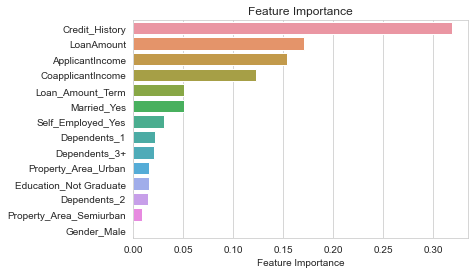

In [93]:
sns.barplot(x=dt_feature_imp["Feature Importance"], y=dt_feature_imp.index)
plt.title("Feature Importance")
plt.show()

## K-Nearest Neighbour

## Modelling

In [94]:
from sklearn.neighbors import KNeighborsClassifier

In [95]:
knn_model = KNeighborsClassifier(n_neighbors=5)

In [97]:
knn_model.fit(X_train_scaled,Y_train)

KNeighborsClassifier()

In [98]:
y_pred = knn_model.predict(X_val_scaled)
y_pred

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1], dtype=uint8)

In [99]:
y_pred_proba = knn_model.predict_proba(X_val_scaled)

In [100]:
pd.DataFrame(y_pred_proba)

,0,1
0,0.6,0.4
1,0.6,0.4
2,0.2,0.8
3,0.2,0.8
4,0.2,0.8
...,...,...
180,0.0,1.0
181,0.0,1.0
182,0.2,0.8
183,0.0,1.0


## Model Performance on Classification Tasks

In [101]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [102]:
confusion_matrix(Y_val, y_pred)

array([[ 18,  35],
       [  8, 124]], dtype=int64)

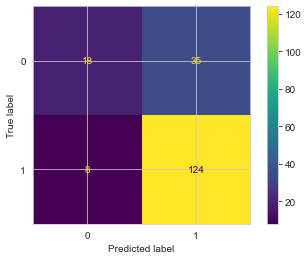

In [103]:
plot_confusion_matrix(knn_model, X_val_scaled, Y_val);

In [104]:
print(confusion_matrix(Y_val, y_pred))
print(classification_report(Y_val, y_pred))

[[ 18  35]
 [  8 124]]
              precision    recall  f1-score   support

           0       0.69      0.34      0.46        53
           1       0.78      0.94      0.85       132

    accuracy                           0.77       185
   macro avg       0.74      0.64      0.65       185
weighted avg       0.75      0.77      0.74       185



## Elbow Method for Choosing Reasonable K Values

In [105]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

In [106]:
val_error_rates = []
train_error_rates = []

for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_scaled, Y_train) 
   
    y_pred_val = knn_model.predict(X_val_scaled)
    y_pred_train = knn_model.predict(X_train_scaled)
    
    val_error = 1 - accuracy_score(Y_val,y_pred_val)
    val_error_rates.append(val_error)
    
    train_error = 1 - accuracy_score(Y_train,y_pred_train)
    train_error_rates.append(train_error)

Text(0, 0.5, 'Error Rate')

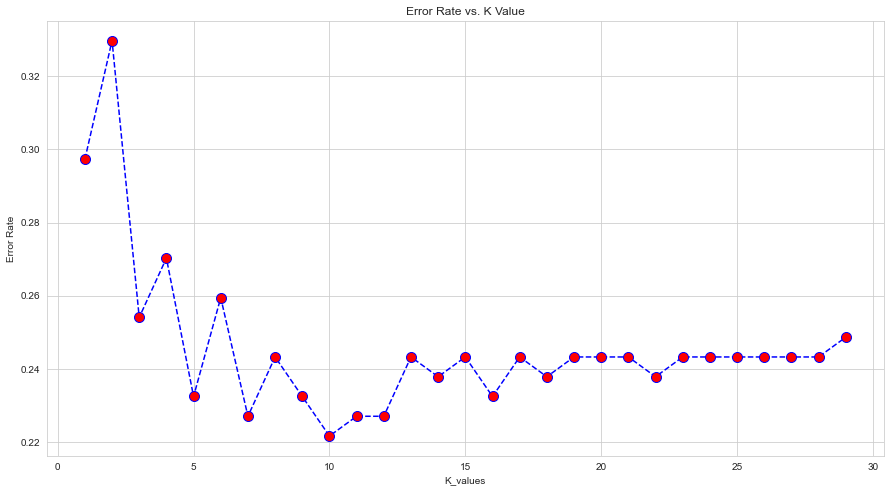

In [107]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), val_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')

Text(0, 0.5, 'Error Rate')

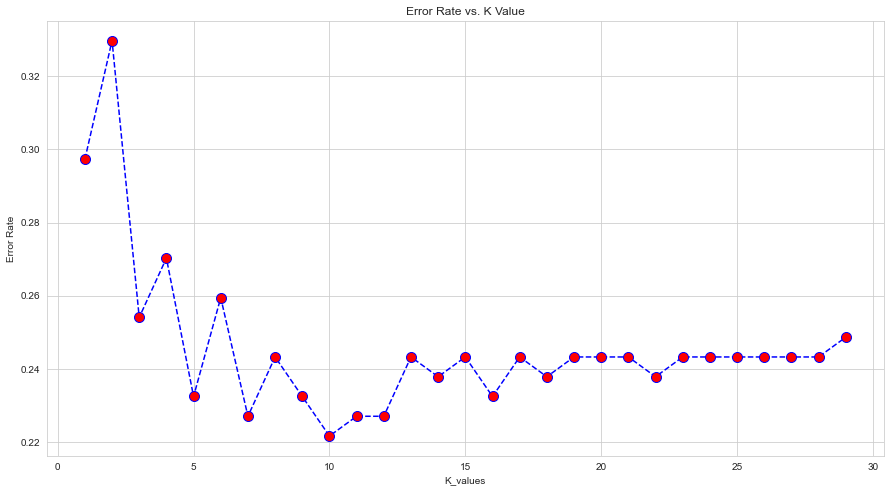

In [109]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), val_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')

Text(0, 0.5, 'Error Rate')

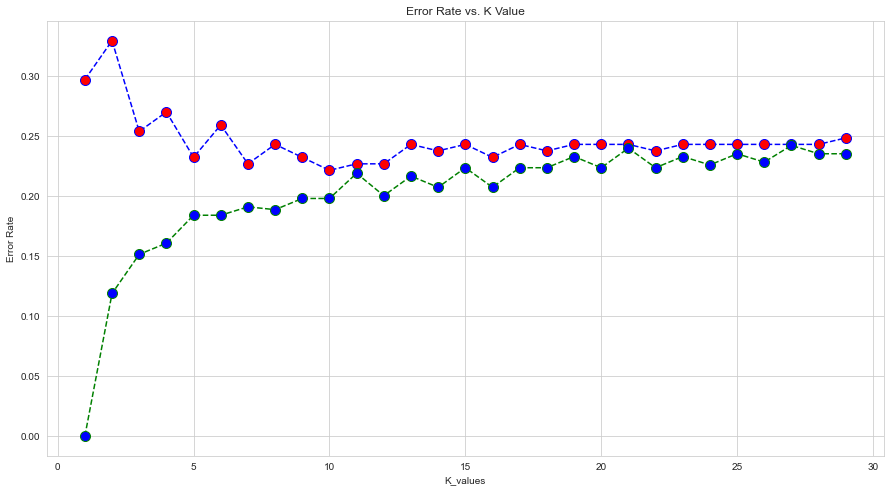

In [110]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), val_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)
plt.plot(range(1,30), train_error_rates, color='green', linestyle='--', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')

## Scores by K=10 (the Error rate is min)

In [111]:
def eval_metric(model, X_train, Y_train, X_val, Y_val):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_val)
    
    print("Val_Set\n")
    print(confusion_matrix(Y_val, y_pred))
    print(classification_report(Y_val, y_pred))
    print()
    print("Train_Set\n")
    print(confusion_matrix(Y_train, y_train_pred))
    print(classification_report(Y_train, y_train_pred))

In [114]:
knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(X_train_scaled,Y_train)
print('WITH K=10\n')
eval_metric(knn, X_train_scaled, Y_train, X_val_scaled, Y_val)

WITH K=10

Val_Set

[[ 16  37]
 [  4 128]]
              precision    recall  f1-score   support

           0       0.80      0.30      0.44        53
           1       0.78      0.97      0.86       132

    accuracy                           0.78       185
   macro avg       0.79      0.64      0.65       185
weighted avg       0.78      0.78      0.74       185


Train_Set

[[ 64  75]
 [ 10 280]]
              precision    recall  f1-score   support

           0       0.86      0.46      0.60       139
           1       0.79      0.97      0.87       290

    accuracy                           0.80       429
   macro avg       0.83      0.71      0.73       429
weighted avg       0.81      0.80      0.78       429



## Cross Validate For Optimal K Value

In [115]:
from sklearn.model_selection import cross_val_score, cross_validate

In [116]:
model = KNeighborsClassifier(n_neighbors=10)

scores = cross_validate(model, X_train_scaled, Y_train, scoring = ['accuracy', 'precision','recall',
                                                                   'f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
1,0.001002,0.004000,0.837209,0.823529,0.965517,0.888889
2,0.001001,0.003001,0.744186,0.736842,0.965517,0.835821
3,0.000999,0.003209,0.767442,0.756757,0.965517,0.848485
4,0.001007,0.003064,0.744186,0.736842,0.965517,0.835821
5,0.001206,0.002324,0.744186,0.736842,0.965517,0.835821
6,0.002005,0.003002,0.860465,0.828571,1.000000,0.906250
7,0.001485,0.002090,0.674419,0.714286,0.862069,0.781250
8,0.000995,0.002088,0.767442,0.743590,1.000000,0.852941
9,0.001000,0.002917,0.813953,0.818182,0.931034,0.870968
10,0.002453,0.003345,0.738095,0.736842,0.965517,0.835821


In [117]:
df_scores.mean()[2:]

test_accuracy     0.769158
test_precision    0.763228
test_recall       0.958621
test_f1           0.849207
dtype: float64

In [ ]:
# According to above Machine Learning models, I got the best prediction performance in SVM and Logistic Regression with F1 score= 0.88 and accuracy= 0.80, while in DT, F1 score = 0.78 and accuracy = 0.70.